# Programming for AI & Data Science (771768) ACW
## Customer Data Pre-processing 
### Student ID: 202101235

#### Background
given data is customer records (acw_user_data.csv). it is not in an appropriate format for analysis. prepare this data for further analyses, including representation changes, filtering, and deriving some new 
attributes/metrics. 
The data include attributes such as first name, second name, credit card number, marital
status, and even contains data on the customer’s car. 

As the number of records provided is significant, therefore it is expected that solutions are 
robust to varying types of data, and varying values, and should offer a programmatic solution. 

##### 1. Read in the provided ACW Data using the CSV library. 

In [1]:
## Importing necessary libraries
import csv
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creating an empty list to append users' data
company_users_data =[]
 
try:
    ## Opening a file reader
    with open('acw_user_data.csv', mode ='r') as row_file:
    ## Reading the file line by line into the list    
        csv_reader = csv.reader(row_file, delimiter =',')
        for line in csv_reader:
            company_users_data.append(line)
    #to test data is saved in our list            
    print(len(company_users_data) > 0 , len(company_users_data),)
except Exception as e:
    print('Could not open the file', e)

    

True 1001


##### 2. Convert data back into its rich structure ( nested structure).
 * Vehicle - consists of make, model, year, and type
 * Credit Card - consists of start date, end date, number, security code, and 
IBN
 * Address - consists of the main address, city, and postcode.s.

In [3]:
# to find out what data fields exist 
header = company_users_data[0]
i =0;
for h in header:
    print(i, '.', h)
    i = i+1


0 . Address Street
1 . Address City
2 . Address Postcode
3 . Age (Years)
4 . Distance Commuted to Work (Km)
5 . Employer Company
6 . Credit Card Start Date
7 . Credit Card Expiry Date
8 . Credit Card Number
9 . Credit Card CVV
10 . Dependants
11 . First Name
12 . Bank IBAN
13 . Last Name
14 . Marital Status
15 . Yearly Pension (GBP)
16 . Retired
17 . Yearly Salary (GBP)
18 . Sex
19 . Vehicle Make
20 . Vehicle Model
21 . Vehicle Year
22 . Vehicle Type


In [4]:
# Creating new structures for costumers_data in dictionary format
vehicles = []
addresses =[]
credit_cards = []
try:
    #looping through our data row by row
    for i in range (len(company_users_data)):
            #dectionaries to hold our new rich text for each person
            Vehicle ={}
            Credit_Card ={}
            Address ={}
            # to exclude the header 
            if i ==0:
                continue
            else:
                #adding features
                Vehicle['make'] = company_users_data[i][19]
                Vehicle['model'] = company_users_data[i][20]
                Vehicle['year'] = int( company_users_data[i][21])
                Vehicle['category'] = company_users_data[i][22]
               #added it to the list
                vehicles.append(Vehicle)
                #do it for other features
                Credit_Card['start_date'] = company_users_data[i][6]
                Credit_Card['end_date'] = company_users_data[i][7]
                Credit_Card['number'] = int(company_users_data[i][8])
                Credit_Card['ccv'] = int(company_users_data[i][9])
                Credit_Card['iban'] = company_users_data[i][12]
                credit_cards.append(Credit_Card)
                Address['street'] = company_users_data[i][0]
                Address['city'] = company_users_data[i][1]
                Address['postcode'] = company_users_data[i][2]
                addresses.append(Address)
except Exception as e:
    print('data processing interrupted, the error is :', e) 

In [5]:
#testing new data structures are created
print (len(vehicles), ',', len(addresses), ',', len(credit_cards))
print (vehicles[0])
print (vehicles[999])

1000 , 1000 , 1000
{'make': 'Hyundai', 'model': 'Bonneville', 'year': 2009, 'category': 'Pickup'}
{'make': 'Geo', 'model': 'S7', 'year': 1993, 'category': 'Van/Minivan'}


In [6]:
# Creating new json like data structures from our processed data 
customers_data_list = []
for i in range(len (company_users_data)):
        if i==0:
            continue
        else:
                customer_data = {}
                customer_data['first_name']= company_users_data[i][11]
                customer_data['second_name'] = company_users_data[i][13]
                customer_data['age'] = int(company_users_data[i][3])
                customer_data['sex']= company_users_data[i][18]
                customer_data['retired'] = company_users_data[i][16]
                customer_data['marital_status'] = company_users_data[i][14]
                customer_data['dependants'] = int(company_users_data[i][10])
                customer_data['salary'] =float( company_users_data[i][17])
                customer_data['pension']= float(company_users_data[i][15])
                customer_data['company']= company_users_data[i][5]
                customer_data['commute_distance'] = float(company_users_data[i][4])
                customer_data['Vehicle'] = vehicles[i-1]    
                customer_data['Credit Card'] = credit_cards[i-1]    
                customer_data['Address'] = addresses[i-1]
                
                customers_data_list.append(customer_data)            

ValueError: invalid literal for int() with base 10: ''

In [7]:
#testing
print(customers_data_list[0])

{'first_name': 'Kieran', 'second_name': 'Wilson', 'age': 89, 'sex': 'Male', 'retired': 'True', 'marital_status': 'married or civil partner', 'dependants': 3, 'salary': 72838.0, 'pension': 7257.0, 'company': 'N/A', 'commute_distance': 0.0, 'Vehicle': {'make': 'Hyundai', 'model': 'Bonneville', 'year': 2009, 'category': 'Pickup'}, 'Credit Card': {'start_date': '08/18', 'end_date': '11/27', 'number': 676373692463, 'ccv': 875, 'iban': 'GB62PQKB71416034141571'}, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}}


##### 3. The client informs you that they have had difficulty with errors in the dependants 
column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion 
from Task 2. These should be changed into something meaningful when 
encountered. 
Print a list where all such error corrections take place. 
E.g. Problematic rows for dependants: [16, 58, 80, 98] 

In [8]:
n = []
try:
    #finding dependants row with empty values
    for i in range(len(company_users_data)):
            if company_users_data[i][10] == '' or company_users_data[i][10]== ' ':
                n.append(i)
    print('Dependants row with empty values are:', n)
except Exception as e:
    print('data processing interrupted, the error is :', e)                 

Dependants row with empty values are: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


In [11]:
try:
    # replacing it with something meaningful
    for i in range(len(company_users_data)):
       if i in n:
            #as dependent values are nonnegative integers, replacing empty values with zero  
            company_users_data[i][10]= 0
except Exception as e:
    print('data processing interrupted, the error is :', e) 
# checking to see values changed to zero(to test uncommand)
#for i in n:
# print(company_users_data[i][10])

#### 4. Write all records to a processed.json file in the JSON data format. This should be a
list of dictionaries, where each index of the list is a dictionary representing a singular 
person

In [12]:
# Creating new json like data structures from our data 
customers_data_list = []
for i in range(len (company_users_data)):
        if i==0:
            continue
        else:
                # dictionary to save each users data
                customer_data = {}
                customer_data['first_name']= company_users_data[i][11]
                customer_data['second_name'] = company_users_data[i][13]
                customer_data['age'] = int(company_users_data[i][3])
                customer_data['sex']= company_users_data[i][18]
                customer_data['retired'] = company_users_data[i][16]
                customer_data['marital_status'] = company_users_data[i][14]
                customer_data['dependants'] = int(company_users_data[i][10])
                customer_data['salary'] =float( company_users_data[i][17])
                customer_data['pension']= float(company_users_data[i][15])
                customer_data['company']= company_users_data[i][5]
                customer_data['commute_distance'] = float(company_users_data[i][4])
                customer_data['Vehicle'] = vehicles[i-1]    
                customer_data['Credit Card'] = credit_cards[i-1]    
                customer_data['Address'] = addresses[i-1]
                # adding the customer's data to the list
                customers_data_list.append(customer_data)            

In [ ]:
#testing
print(customers_data_list[0])

In [13]:
# saving the formatted customer data to a json file

with open ('processed.json', mode = 'w', newline = '') as cdf:
    json.dump(customers_data_list, cdf)

#### 5. You should create two additional file outputs, retired.json and employed.json,
these should contain all retired customers (as indicated by the retired field in the 
CSV), and all employed customers respectively (as indicated by the employer field in 
the CSV) and be in the JSON data format. 

In [14]:
#new lists to hold new users groups
retired = []
employed =[]
#looping through the data
for person in customers_data_list:
    # checking the condition
    if person['retired'] == 'True' :
        #add them to the lists based on their category
        retired.append(person)
    else:
        employed.append(person)
#testing to see new data added to the lists
print('number of employed are:', len(employed), 'and', 'number of retired are:',len(retired))
    

number of employed are: 754 and number of retired are: 246


In [15]:
# saving the formatted customer data to a json file

with open ('retired.json', mode = 'w', newline = '') as rjf:
    json.dump(retired, rjf)

with open ('employed.json', mode = 'w', newline = '') as ejf:
    json.dump(employed, ejf)
    

#### 6. The client states that there may be some issues with credit card entries. Any 
customers that have more than 10 years between their start and end date need 
writing to a separate file, called remove_ccard.json, in the JSON data format. The
client will manually deal with these later based on your output. They request that you 
write a function to help perform this, which accepts a single row from the CSV data, 
and outputs whether the row should be flagged. This can then be used when 
determining whether to write the current person to the remove_ccard file

In [16]:
#creating a function
def check_credit_card(row):
    # If the header is given
    if row[6] == 'Credit Card Start Date':
        pass
    else:
        #need card's start and end date
        start_date = row[6].split('/')
        end_date = row[7].split('/')
    
        #need to cast them to ints and calculate the start month 
        start = int(start_date[0]) + int (start_date[1])*12
        end= int(end_date[0]) + int (end_date[1])*12
        #calculating the time 
        diff_year = (end- start)/12
       # check if it is bigger than 10 years
        if diff_year> 10:
            #alert the operator
            print ( 'It is more than 10 years between start and expiry date of customer\'s card')
            # let them check the row manually
            print(row)
            


#### 7. You have been tasked with calculating some additional metrics which will be used for 
ranking customers. You should create a new data attribute for our customers called 
“Salary-Commute”. Reading in from processed.json:

a. Add, and calculate appropriately, this new attribute. It should represent the 
Salary that a customer earns, per mile of their commute. 
i. Note: If a person travels 1 or fewer commute Km, then their salarycommute would be just their salary.

b. Sort these records by that new metric, in ascending order. 

c. Store the output file out as a JSON format, for a commute.json file

In [75]:
try:
    data =[]
    #opening the file
    with open('processed.json', mode = 'r') as prod:
        #copy the json file
        data = json.load(prod)
        # looping through 
        for person in data:
            Salary_Commute = 0.0
            # distance less than a mile no change to salary
            if person['commute_distance'] <1:
               Salary_Commute = person['salary']
            else:
                #calculatin Salary_Commute
                Salary_Commute = person['salary']/person['commute_distance']
            #adding it to dataset  
            person['Salary-Commute'] = Salary_Commute
    #testing new feature is added to data structure
    print(data[5])
    #sorting it (found it on 
    data = pd.DataFrame(data)
    data = data.sort_values(by=['Salary-Commute'])
   # save it to new file
    with open('commute.json', mode = 'w') as comm:
         json.dump( data, comm)
except Exception as e:
     print('data processing interrupted, the error is :', e)  

{'first_name': 'Ryan', 'second_name': 'Clarke', 'age': 23, 'sex': 'Male', 'retired': 'False', 'marital_status': 'married or civil partner', 'dependants': 3, 'salary': 38100.0, 'pension': 0.0, 'company': 'Gill and Sons', 'commute_distance': 10.73, 'Vehicle': {'make': 'Lexus', 'model': 'Paceman', 'year': 2004, 'category': 'Van/Minivan'}, 'Credit Card': {'start_date': '03/15', 'end_date': '05/15', 'number': 4485214746578045493, 'ccv': 123, 'iban': 'GB29SSDY05529526374313'}, 'Address': {'street': 'Studio 43M Emily rapid', 'city': 'West Derekborough', 'postcode': 'W1J 0DL'}, 'Salary-Commute': 3550.7921714818267}
data processing interrupted, the error is : Object of type DataFrame is not JSON serializable


## Data Visualisation Using Pandas and Seaborn

#### 1. Obtain the Data Series for Salary, and Age, and calculate the following:
a. Mean Salary
b. Median Age


In [73]:
# obtaining Salary, Age from csv file
fields = ['Age (Years)', 'Yearly Salary (GBP)']
salary_age_list = pd.read_csv('acw_user_data.csv', usecols=fields)
#change their name for simplicity
new_name ={'Age (Years)':'age', 'Yearly Salary (GBP)':'salary'}
salary_age_list = salary_age_list.rename(columns=new_name)
#using pandas to calculate mean of Salary
mean_salary = salary_age_list['salary'].mean()
print(f'Mean_salary :{mean_salary}')

Mean_salary :57814.078


In [21]:
# Median of Age
#creating a new series for age
age = salary_age_list['age']
#sorting it
sorted_age = age.sort_values()
# Calculating the median
median_age = sorted_age.median()

#Display the result
print(f'Median Age: {median_age}')

Median Age: 54.0


#### 2. Perform univariate plots of the following data attributes:
a. Age, calculating how many bins would be required for a bin_width of 5
b. Dependents, fixing data errors with seaborn itself.
c. Age (of default bins), conditioned on Marital Status


In [30]:
#creating a dataframe from our list
customers = pd.DataFrame(customers_data_list)
# calculating number of bins with a width of 5
print(f'Number of bins: {(sorted_age.max() - sorted_age.min())/5}')


Number of bins: 14.6


Text(0, 0.5, 'number of customer in age group')

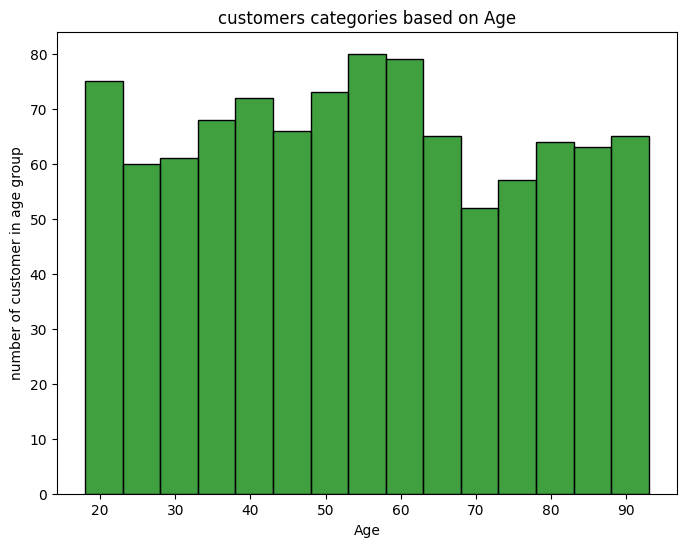

In [59]:
# ploting age useing histplot for charts, range to clarify the age range in our data, 6 is an extra addition to range of age so we don't loss any value
plt.figure(figsize=(8, 6))
plot = sns.histplot(customers['age'], bins=range(min(customers['age']), max(customers['age']) + 6, 5), kde=False, color='green')
# adding details like Tittel and axes name
plt.title('customers categories based on Age')
# Labels for x and y axes
plt.xlabel('Age')
plt.ylabel('number of customer in age group')


Text(0, 0.5, 'number of customer in each group')

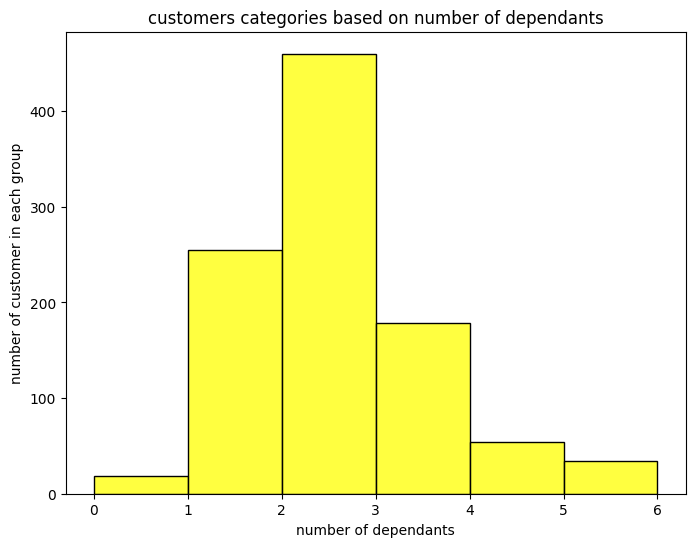

In [60]:
#  Dependents plot
plt.figure(figsize=(8, 6))
plot1 = sns.histplot(customers['dependants'], bins=range(min(customers['dependants']), max(customers['dependants']) + 2, 1), kde=False, color='yellow')

plt.title('customers categories based on number of dependants')
# Labels for x and y axes
plt.xlabel('number of dependants')
plt.ylabel('number of customer in each group')

Text(0, 0.5, 'Count')

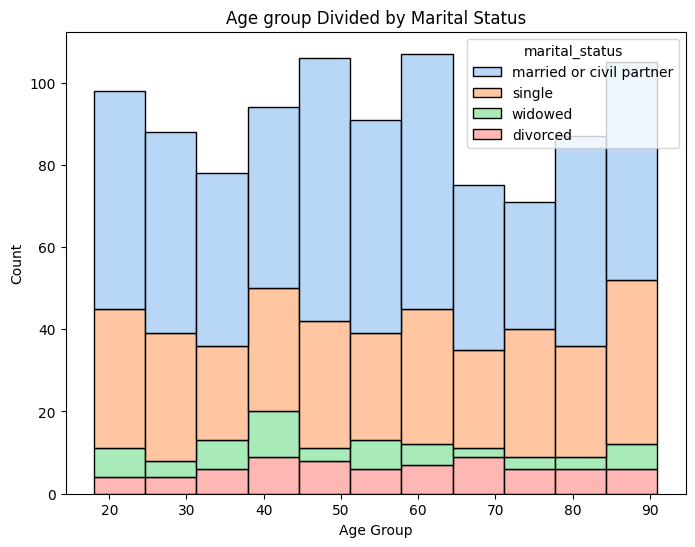

In [61]:
# Age (of default bins), conditioned on Marital Status
# hue will divide the age groups based on marital status categories, multiple and palette are styling methods
plt.figure(figsize=(8, 6))
plot2 = sns.histplot(data= customers, x='age', bins='auto', hue='marital_status', kde=False, multiple="stack", palette='pastel' )

plt.title('Age group Divided by Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Count')

#### 3. Perform multivariate plots with the following data attributes:
a. Commuted distance against salary.
b. Age against Salary
c. Age against Salary conditioned by Dependants


Text(0, 0.5, 'Annual Salary(GBP)')

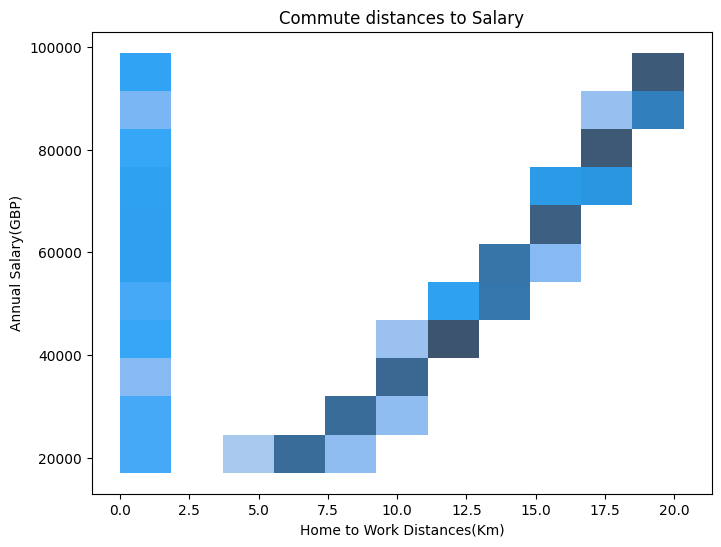

In [62]:
# a. hist plot of commuted distance against salary 
plt.figure(figsize=(8, 6))
plot3 = sns.histplot(data= customers, x='commute_distance', y= 'salary')
plt.title('Commute distances to Salary')
plt.xlabel('Home to Work Distances(Km)')
plt.ylabel('Annual Salary(GBP)')                      

Text(0, 0.5, 'Annual Salary(GBP)')

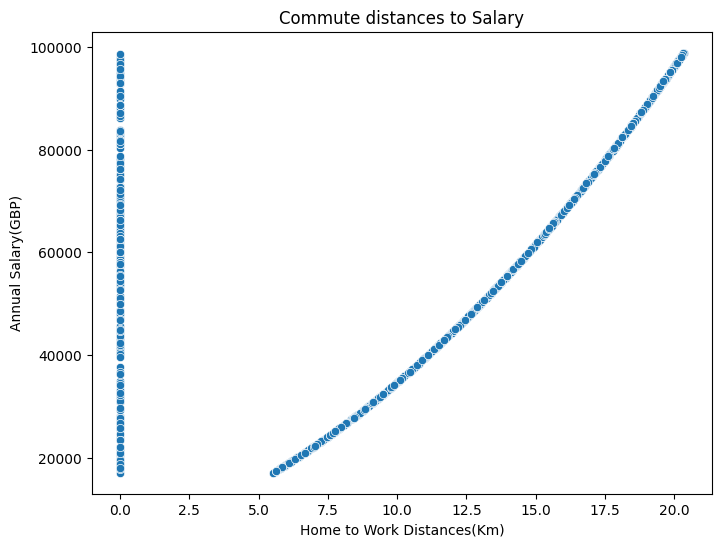

In [63]:
# scatter plot of same data
plt.figure(figsize=(8, 6))
plot4 = sns.scatterplot(data= customers, x='commute_distance', y= 'salary')
plt.title('Commute distances to Salary')
plt.xlabel('Home to Work Distances(Km)')
plt.ylabel('Annual Salary(GBP)')

Text(0, 0.5, 'Annual Salary(GBP)')

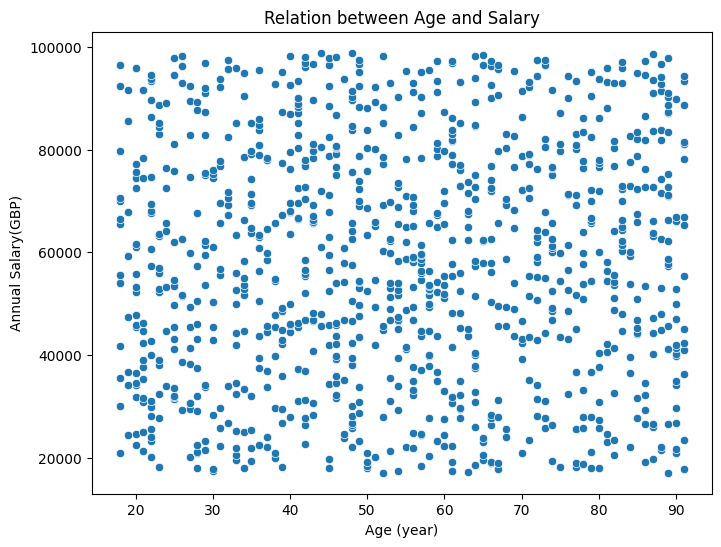

In [64]:
#b. Age against Salary 
plt.figure(figsize=(8, 6))
plot5 = sns.scatterplot(data= grouped_data, x='age', y= 'salary')
plt.title('Relation between Age and Salary')
plt.xlabel('Age (year)')
plt.ylabel('Annual Salary(GBP)')

Text(0, 0.5, 'Annual Salary(GBP)')

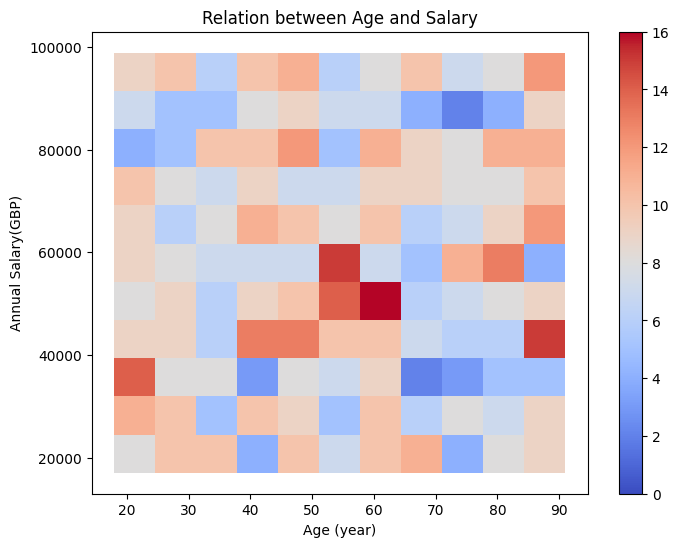

In [65]:
# histplot that shows the distribution of salary to the age.blue low dencity, red high dencity 
plt.figure(figsize=(8, 6))
plot6 = sns.histplot(data= customers, x='age', y= 'salary', cmap ='coolwarm', cbar = True)
plt.title('Relation between Age and Salary')
plt.xlabel('Age (year)')
plt.ylabel('Annual Salary(GBP)')

Text(0, 0.5, 'Annual Salary (GBP)')

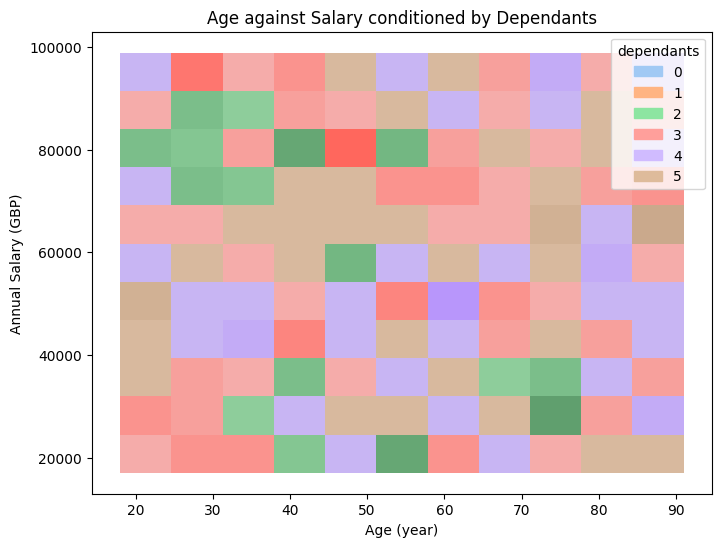

In [70]:
#c. Age against Salary conditioned by Dependants
plt.figure(figsize=(8, 6))
plot7 = sns.histplot(data=customers, x='age', y='salary', hue='dependants', palette='pastel'  )
plt.title('Age against Salary conditioned by Dependants')
plt.xlabel('Age (year)')
plt.ylabel('Annual Salary (GBP)')

Text(0, 0.5, 'Annual Salary (GBP)')

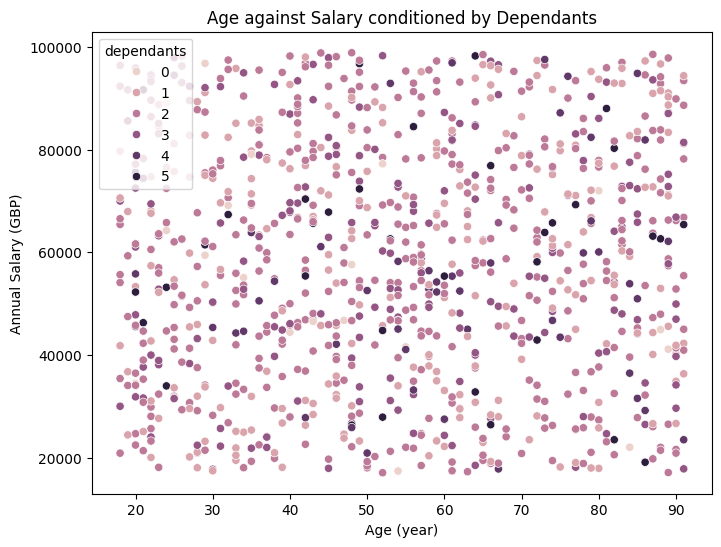

In [71]:
# scatterplot of age to salary with 
plt.figure(figsize=(8, 6))
plot8 = sns.scatterplot(data= customers, x='age', y='salary', hue='dependants' )
plt.title('Age against Salary conditioned by Dependants')
plt.xlabel('Age (year)')
plt.ylabel('Annual Salary (GBP)')

Text(47.118127700617265, 0.5, 'Annual Salary (GBP)')

<Figure size 800x600 with 0 Axes>

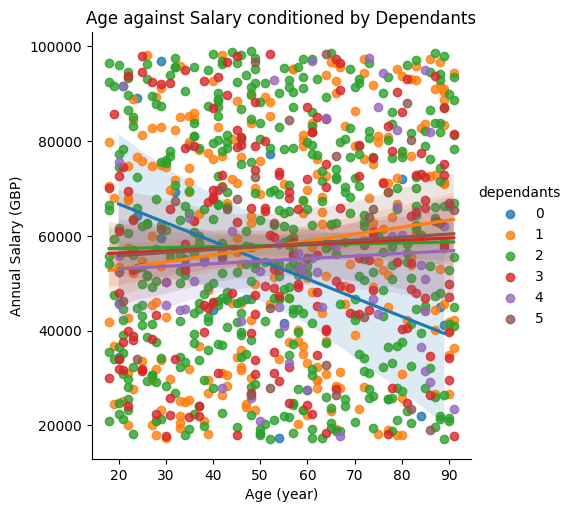

In [68]:
# To show scattering and the regression lines in one plot
plt.figure(figsize=(8, 6))
plot9 = sns.lmplot(data= customers, x='age', y='salary', hue='dependants' )
plt.title('Age against Salary conditioned by Dependants')
plt.xlabel('Age (year)')
plt.ylabel('Annual Salary (GBP)')

#### 4. Your client would like the ability to save the plots which you have produced. Provide
a Notebook cell that can do this.

In [72]:
# creating a dictionary of figure names and plots
figures ={ 
'./age_hist.png': plot,
'./age_salary_scatter.png' : plot5,
'./age_salary.png' : plot6,
'./age_salary_hist.png' : plot7,
'./age_salary_scatter_hue.png' : plot8,
'./age_salary_ml.png' : plot9}
# saving plots
for k,v in figures.items():
    #creating figure
    fig = v.figure
    #saving it
    fig.savefig(k)